In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<ipython-input-3-21b65ce220ad>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
d=pd.read_csv('/content/ADANIPORTS_new.csv')

In [5]:
d.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2295,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2296,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
d

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,17-01-2012,ADANIPORTS,EQ,135.50,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260000e+13,18374,1004327,0.6138
1,18-01-2012,ADANIPORTS,EQ,140.00,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.260000e+13,15615,404925,0.4547
2,19-01-2012,ADANIPORTS,EQ,141.70,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.140000e+13,31299,721545,0.4955
3,20-01-2012,ADANIPORTS,EQ,149.40,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.510000e+13,23335,861145,0.5270
4,23-01-2012,ADANIPORTS,EQ,155.40,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.480000e+13,12400,820653,0.4951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,26-04-2021,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.890000e+14,116457,838079,0.0892
2295,27-04-2021,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.540000e+15,236896,1779639,0.0865
2296,28-04-2021,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.380000e+14,130847,1342353,0.1203
2297,29-04-2021,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.040000e+15,153293,1304895,0.0942


In [ ]:
#Calculating the datasets for 70% train and 30% test

#models for 70% train and 30% test
X=np.array(d['Close']).reshape(-1,1)
y=np.array(d['Turnover']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.3,random_state=0)
regr=LinearRegression()
regr.fit(X_train,y_train)
X_train.shape
y_train.shape

(1609, 1)

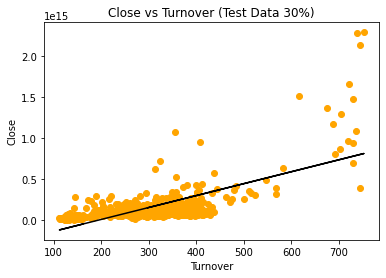

In [ ]:
#predicting the test result and visualizing the test result
y_pred=regr.predict(X_test)
y_pred
plt.scatter(X_test,y_test,color='orange')
plt.plot(X_test,regr.predict(X_test),color='black')
plt.title('Close vs Turnover (Test Data 30%)')
plt.xlabel('Turnover')
plt.ylabel('Close')
plt.show()

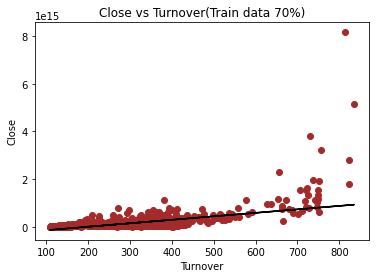

In [ ]:
#predicting the train result and visualizing the results
X_pred = regr.predict(X_train)
X_pred
plt.scatter(X_train,y_train,color='brown')
plt.plot(X_train,regr.predict(X_train),color='black')
plt.title('Close vs Turnover(Train data 70%)')
plt.xlabel('Turnover')
plt.ylabel('Close')
plt.show()

In [ ]:
#Calculating the Mean squared error
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print("Mean squared error of dataset is ",MSE)

Mean squared error of dataset is  3.0588468344214594e+28


In [ ]:
#Calculating the datasets for 80% train and 20% test

#models for 75% train and 25% test
X=np.array(d['Turnover']).reshape(-1,1)
y=np.array(d['Close']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
regr=LinearRegression()
regr.fit(X_train,y_train)
X_train.shape
y_train.shape

(1839, 1)

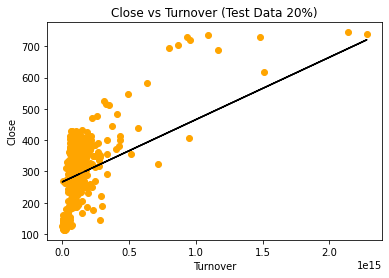

In [ ]:
#predicting the test result and visualizing the test result
y_pred=regr.predict(X_test)
y_pred
plt.scatter(X_test,y_test,color='orange')
plt.plot(X_test,regr.predict(X_test),color='black')
plt.title('Close vs Turnover (Test Data 20%)')
plt.xlabel('Turnover')
plt.ylabel('Close')
plt.show()

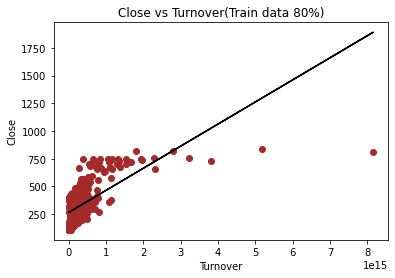

In [ ]:
#predicting the train result and visualizing the results
X_pred = regr.predict(X_train)
X_pred
plt.scatter(X_train,y_train,color='brown')
plt.plot(X_train,regr.predict(X_train),color='black')
plt.title('Close vs Turnover(Train data 80%)')
plt.xlabel('Turnover')
plt.ylabel('Close')
plt.show()

In [ ]:
#Calculating the Mean squared error
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print("Mean squared error of dataset is ",MSE)

Mean squared error of dataset is  9404.75102469166


In [ ]:
#Calculating the datasets for 90% train and 10% test

#models for 75% train and 25% test
X=np.array(d['Turnover']).reshape(-1,1)
y=np.array(d['Close']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
regr=LinearRegression()
regr.fit(X_train,y_train)
X_train.shape
y_train.shape

(2069, 1)

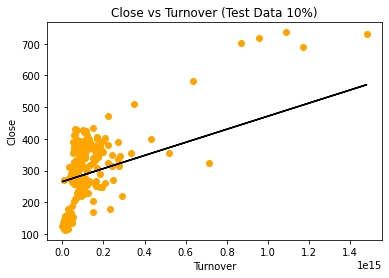

In [ ]:
#predicting the test result and visualizing the test result
y_pred=regr.predict(X_test)
y_pred
plt.scatter(X_test,y_test,color='orange')
plt.plot(X_test,regr.predict(X_test),color='black')
plt.title('Close vs Turnover (Test Data 10%)')
plt.xlabel('Turnover')
plt.ylabel('Close')
plt.show()

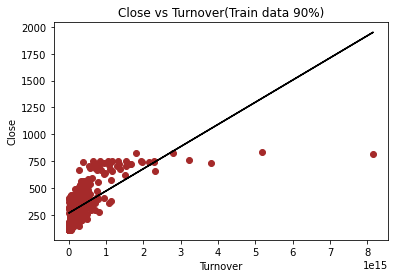

In [ ]:
#predicting the train result and visualizing the results
X_pred = regr.predict(X_train)
X_pred
plt.scatter(X_train,y_train,color='brown')
plt.plot(X_train,regr.predict(X_train),color='black')
plt.title('Close vs Turnover(Train data 90%)')
plt.xlabel('Turnover')
plt.ylabel('Close')
plt.show()

In [ ]:
#Calculating the Mean squared error
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print("Mean squared error of dataset is ",MSE)

Mean squared error of dataset is  9500.814403713559
